<a href="https://colab.research.google.com/github/alriyadsouza/MediScanPro/blob/main/MediScanPro_New_Functionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

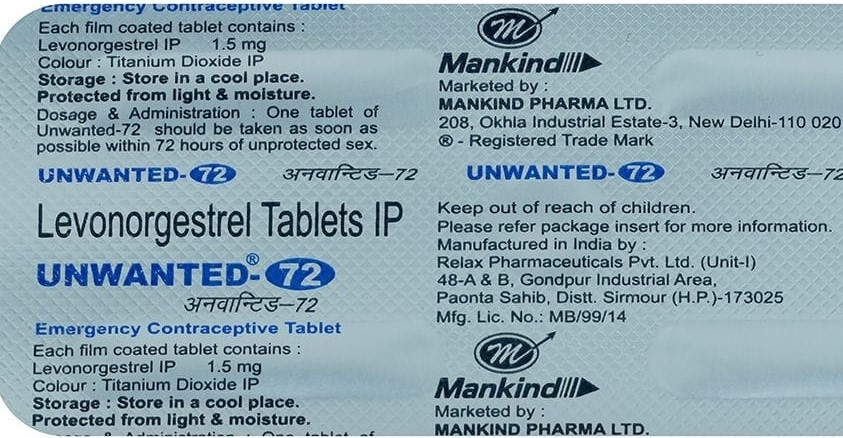

Cropped image saved as cropped_image.jpg


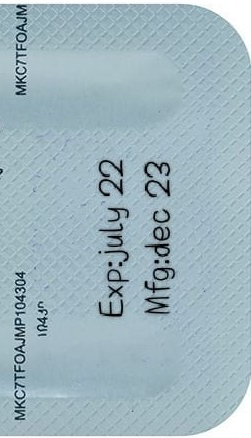

Uncropped image saved as uncropped_image.jpg


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = 'do1.jpg'
image = cv2.imread(image_path)

# Calculate crop width
crop_width = int(image.shape[1] * 0.23)  # Crop 25% from the right end

# Crop the image and the remaining part
cropped_image = image[:, :-crop_width]  # Crop from the right end
uncropped_image = image[:, -crop_width:]  # Remaining part

# Save cropped image
cropped_image_path = 'cropped_image.jpg'
cv2.imwrite(cropped_image_path, cropped_image)
cv2_imshow(cropped_image)
print(f"Cropped image saved as {cropped_image_path}")

# Save uncropped image
uncropped_image_path = 'uncropped_image.jpg'
cv2.imwrite(uncropped_image_path, uncropped_image)
cv2_imshow(uncropped_image)
print(f"Uncropped image saved as {uncropped_image_path}")


# Code for uncropped_image.jpg to extract mfg and exp

In [ ]:
image_path = 'uncropped_image.jpg'

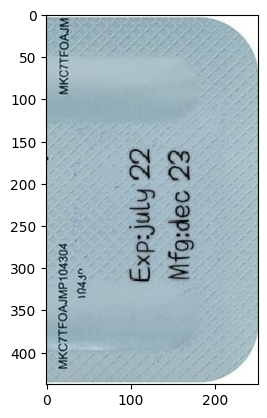

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Plot...
original_image = cv2.imread(image_path)
original_image = original_image[:, :, ::-1]
plt.imshow(original_image)

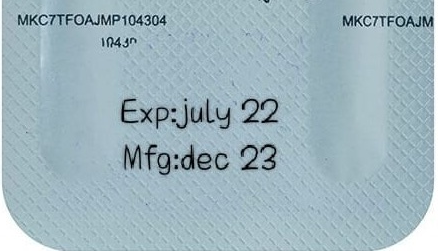

In [ ]:
image = cv2.imread(image_path)

# Rotate the image 90 degrees clockwise
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Save the rotated image
image_path = 'rotated_image.jpg'
cv2.imwrite(image_path, rotated_image)
cv2_imshow(rotated_image)

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,815 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

MKC7TFOAJMP 104304 MKC7TFOAJM
1ngse

Exp:july 22
Mfg:dec 23



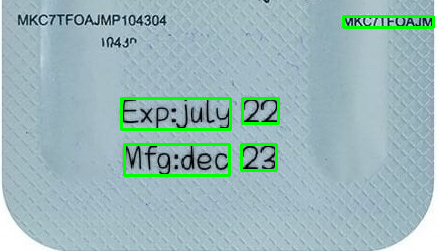

-1

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

# Set the path to the image
image_path = 'rotated_image.jpg'

# Read the image
image = cv2.imread(image_path)

# Extract and print text from the entire image
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

# Get the data for bounding boxes
d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# Draw the boxes on the image
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 50:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)


In [ ]:
import re

# Regular expressions for extraction
mfg_regex = re.compile(r'Mfg.*')
exp_regex = re.compile(r'Exp.*')



# Set the path to the image
image_path = 'rotated_image.jpg'

# Read the image
image = cv2.imread(image_path)
# Extract and print text from the entire image
extracted_text = pytesseract.image_to_string(image)
#print(extracted_text)

# Extract Mfg and Exp information using regex
mfg_match = mfg_regex.search(extracted_text)
exp_match = exp_regex.search(extracted_text)

# Initialize variables for storing extracted information
mfg = ''
exp = ''

# Check if matches are found
if mfg_match:
    mfg = mfg_match.group(0)

if exp_match:
    exp = exp_match.group(0)

# Display extracted information if they are not empty
if mfg or exp:
    if mfg:
        print(f"{mfg}\n")
    if exp:
        print(f"{exp}\n")


Mfg:dec 23

Exp:july 22



# Code for cropped_image.jpg for name extraction


Box 1:
Mankind|>

Marketed by :
MANKIND PHARMA LTD.


Cropped Image 1:


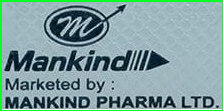



Box 2:
Emergency Contraceptive Tablet
Each film coated tablet contains :
Levonorgestrel IP__ 1.5 mg
Colour : Titanium Dioxide IP
Storage : Store in a cool place.
Protected from light & moisture.


Cropped Image 2:


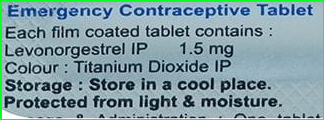



Box 3:
UNWANTED- @@>
WIMPCE—72


Cropped Image 3:


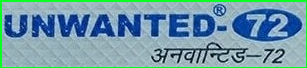



Box 4:
Levonorgestrel


Cropped Image 4:


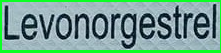



Box 5:
Tablets


Cropped Image 5:


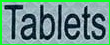



Box 6:
Keep out of reach of children.
Please refer package insert for more information.
Manufactured in India by :

Relax Pharmaceuticals Pvt. Ltd. (Unit-l)

48-A & B, Gondpur Industrial Area,

Paonta Sahib, Distt. Sirmour (H.P.)-173025

Mfg. Lic. No.: MB/99/14


Cropped Image 6:


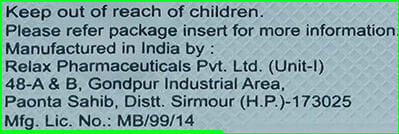



Box 7:
UNWANTED-@@>


Cropped Image 7:




Box 8:
UNWANTED- @>


Cropped Image 8:




Box 9:
Mankind|>

Marketed by :

MANKIND PHARMA LTD.

208, Okhia Industrial Estate-3, New Delhi-110 020
® - Registered Trade Mark


Cropped Image 9:


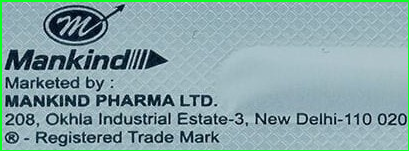



Box 10:
cmergency Vontracepive raviet
Each film coated tablet contains :
Levonorgestrel IP 1.5mg

Colour : Titanium Dioxide IP
Storage : Store in a cool place.
Protected from light & moisture.
Dosage & Administration : One tablet of
Unwanted-72 should be taken as soon as
possible within 72 hours of unprotected sex.


Cropped Image 10:


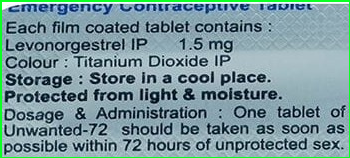

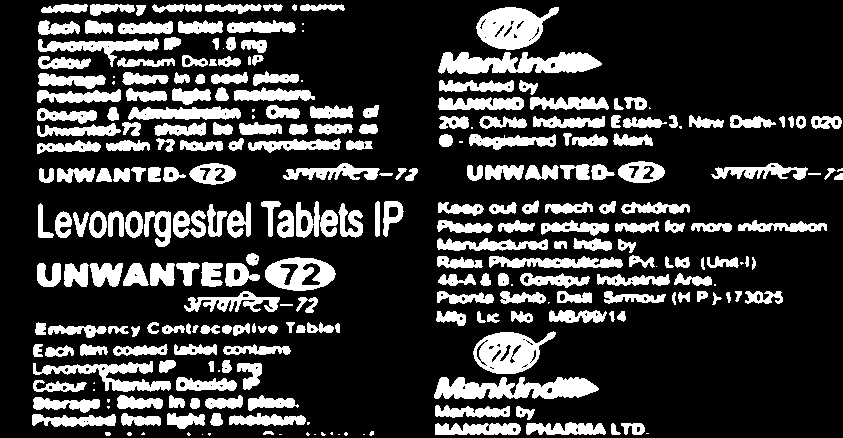

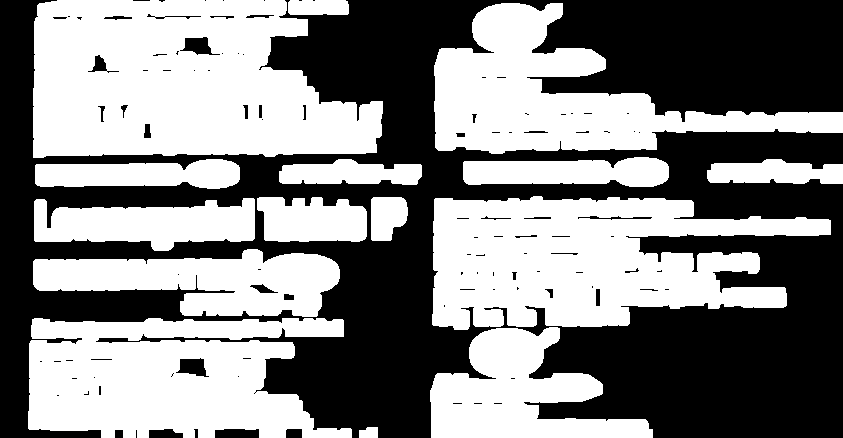

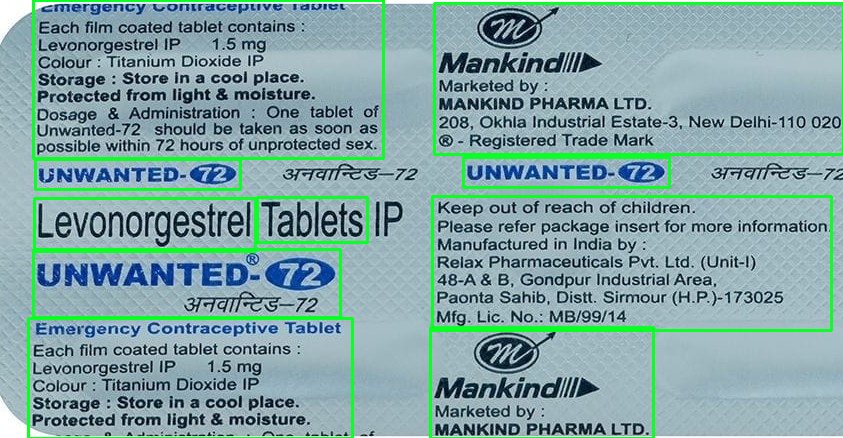

-1

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Load image
image_path = 'cropped_image.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur and thresholding
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Dilate image to enhance text
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=2)

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Initialize a counter for naming cropped images
box_counter = 0

# Iterate through contours
for i, c in enumerate(cnts):
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(c)

    # Extract ROI (Region of Interest) using bounding box coordinates
    roi = image[y:y+h, x:x+w]

    # Perform OCR on ROI
    text = pytesseract.image_to_string(roi)

    # Check if text is not empty
    if text.strip():
        # Increment box counter
        box_counter += 1

        # Display text
        print(f'Box {box_counter}:')
        print(text.strip())  # Strip any leading/trailing whitespace
        print('\n')

        # Draw bounding box on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

        # Save cropped image with a unique name
        cropped_image_path = f'cropped_box_{box_counter}.jpg'
        cv2.imwrite(cropped_image_path, roi)

        # Display cropped image
        print(f'Cropped Image {box_counter}:')
        cv2_imshow(roi)
        print('\n')

# Display the images with bounding boxes
cv2_imshow(thresh)
print('\n')
cv2_imshow(dilate)
print('\n')
cv2_imshow(image)
cv2.waitKey(0)


In [ ]:
import re

# Regular expressions for extraction
storage_regex = re.compile(r'Stor.*\s.*\.')

dosage_regex = re.compile(r'Dosage[^.]+')

# Iterate through contours (assuming the previous cell executed and defined `cnts`)
for i, c in enumerate(cnts):
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(c)

    # Extract ROI (Region of Interest) using bounding box coordinates
    roi = image[y:y+h, x:x+w]

    # Perform OCR on ROI
    text = pytesseract.image_to_string(roi)

    # Extract Dosage and Storage information using regex
    dosage_match = dosage_regex.search(text)
    storage_match = storage_regex.search(text)

    # Initialize variables for storing extracted information
    dosage = ''
    storage = ''

    # Check if matches are found
    if dosage_match:
        dosage = dosage_match.group(0)

    if storage_match:
        storage = storage_match.group(0)

    # Display extracted information if they are not empty
    if dosage or storage:
        if dosage:
            print(f"{dosage}\n")
        if storage:
            print(f"{storage}\n")



Storage : Store in a cool place.
Protected from light & moisture.

Dosage & Administration : One tablet of
Unwanted-72 should be taken as soon as
possible within 72 hours of unprotected sex

Storage : Store in a cool place.
Protected from light & moisture.



# QR code generation

In [ ]:
!pip install qrcode[pil]

In [ ]:
import qrcode
from qrcode.image.svg import SvgImage

data = f"{dosage}\n{storage}\n{mfg}\n{exp}"

# Create a QR code
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=5,
    border=4
)
qr.add_data(data)
qr.make(fit=True)

# Generate the QR code image
img = qr.make_image(fill_color="black", back_color="white")
img.save("micro_qr_code.png")
